# Time Series Basics

In [20]:
# Initial imports
import pandas as pd
import os
import datetime
import panel as pn
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
from datetime import datetime,date
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import ccxt
import math
import pandas_datareader as web
plt.style.use('fivethirtyeight')

%matplotlib inline
from dotenv import load_dotenv

## Create a dataframe reading a CSV file

In [37]:
from pathlib import Path
# Set the file pahth
file_path = Path("../Resources/Industry_Data.csv")

# Create a Pandas dataframe from a csv file
df = pd.read_csv(file_path)

## Exploring the Data

In [295]:
# get the first 10 rows from the dataframe
#df.head()

## Fixing column names

In [39]:
# set column names
col_names = ["Industries", "Names", "Qty"]

# Recreate the DataFrame
df = pd.read_csv(file_path, header = None)

# Add column names
df.columns = col_names
df.head(10)

,Industries,Names,Qty
0,Industry,Real State Industry,Qty
1,Real State Industry,Expected Annual Return:,22.40%
2,Real State Industry,Annual Volatility:,23.70%
3,Real State Industry,Sharpe Ratio:,0.86
4,Communication Industry,Expected Annual Return:,33.70%
5,Communication Industry,Annual Volatility:,24.30%
6,Communication Industry,Sharpe Ratio:,1.3
7,Energy Industry,Expected Annual Return:,19.60%
8,Energy Industry,Annual Volatility:,49.40%
9,Energy Industry,Sharpe Ratio:,0.36


In [41]:
# Delete row # 1 to remove old header
df = df.drop(df.index [0])
df

,Industries,Names,Qty
1,Real State Industry,Expected Annual Return:,22.40%
2,Real State Industry,Annual Volatility:,23.70%
3,Real State Industry,Sharpe Ratio:,0.86
4,Communication Industry,Expected Annual Return:,33.70%
5,Communication Industry,Annual Volatility:,24.30%
...,...,...,...
89,Consumer Discretionary,TGT,2
90,Consumer Discretionary,YUM,7
91,Tsla AAPL SQ,TSLA,2
92,Tsla AAPL SQ,AAPL,11


# Identify DataFrame Data Types

In [42]:
df.dtypes

Industries    object
Names         object
Qty           object
dtype: object

# Assess data quality by identifiying the number of rows

In [12]:
df.count()

Industries    94
Names         94
Qty           94
dtype: int64

## Assess data quality by identifying the number of times a value occurs

In [43]:
# Identify frequency values
df["Industries"].value_counts()

Consumer Discretionary       12
Information Tech Industry    10
Materials Industry            9
Financials Industry           8
Consumer Staples Industry     8
Communication Industry        8
Industrial Industry           7
Utilities Industry            7
Health Care Industry          7
Real State Industry           7
Tsla AAPL SQ                  6
Energy Industry               4
Name: Industries, dtype: int64

# Assess data quality by checking for nulls

In [44]:
# Check for nulls values
df.isnull()

,Industries,Names,Qty
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
89,False,False,False
90,False,False,False
91,False,False,False
92,False,False,False


## Assess data quality by determining the percentage of nulls

In [46]:
# Determine percentage of nulls
df.isnull().mean() * 100

Industries    0.0
Names         0.0
Qty           0.0
dtype: float64

# Clean data by replacing % symbols

In [47]:
# Clean identified numeric fileds with % symbol
df["Qty"] = df["Qty"].str.replace("%", "")
df["Qty"]

1     22.40
2     23.70
3      0.86
4     33.70
5     24.30
      ...  
89        2
90        7
91        2
92       11
93        8
Name: Qty, Length: 93, dtype: object

In [48]:
df.dtypes

Industries    object
Names         object
Qty           object
dtype: object

In [49]:
# Convert 'Qty' from 'object' to 'float'
df["Qty"] = df["Qty"].astype("float")

In [50]:
df.dtypes

Industries     object
Names          object
Qty           float64
dtype: object

In [53]:
df.head(40)

,Industries,Names,Qty
1,Real State Industry,Expected Annual Return:,22.40
2,Real State Industry,Annual Volatility:,23.70
3,Real State Industry,Sharpe Ratio:,0.86
4,Communication Industry,Expected Annual Return:,33.70
5,Communication Industry,Annual Volatility:,24.30
6,Communication Industry,Sharpe Ratio:,1.30
7,Energy Industry,Expected Annual Return:,19.60
8,Energy Industry,Annual Volatility:,49.40
9,Energy Industry,Sharpe Ratio:,0.36
10,Health Care Industry,Expected Annual Return:,43.60


In [109]:
# Select the first 36 rows of the DataFrame
df_1 = df.iloc[0:36]
df_1

,Industries,Names,Qty
1,Real State Industry,Expected Annual Return:,22.40
2,Real State Industry,Annual Volatility:,23.70
3,Real State Industry,Sharpe Ratio:,0.86
4,Communication Industry,Expected Annual Return:,33.70
5,Communication Industry,Annual Volatility:,24.30
6,Communication Industry,Sharpe Ratio:,1.30
7,Energy Industry,Expected Annual Return:,19.60
8,Energy Industry,Annual Volatility:,49.40
9,Energy Industry,Sharpe Ratio:,0.36
10,Health Care Industry,Expected Annual Return:,43.60


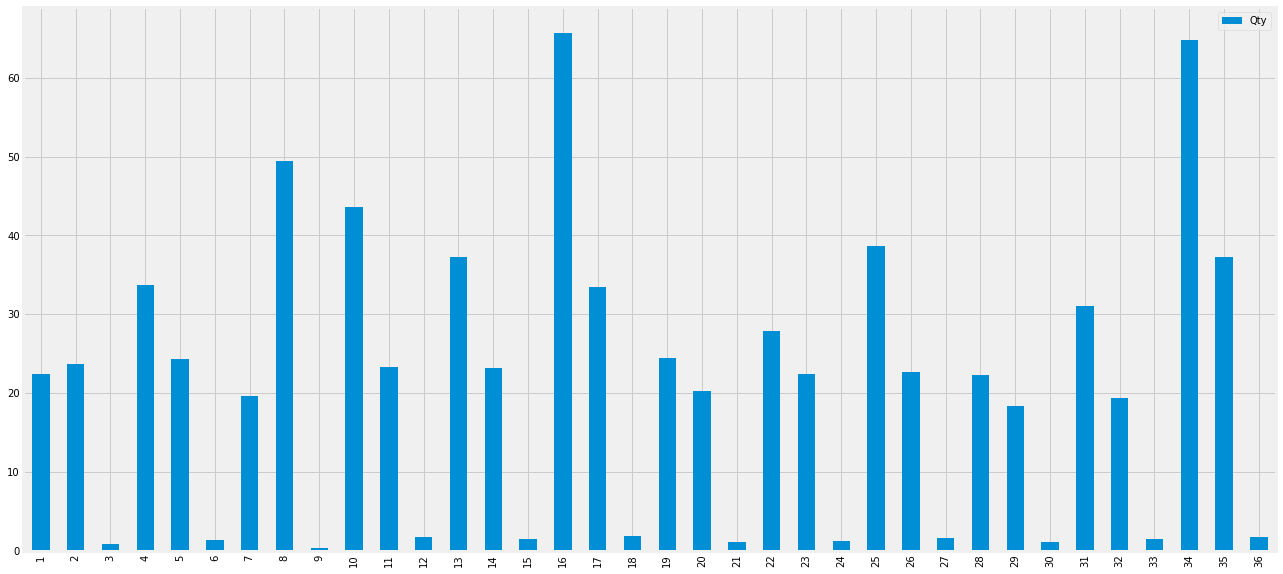

In [110]:
# Plot a line chart of the data without setting 'Industries' column as index
df_1.plot(kind='bar', figsize=(20,10));

In [111]:
df_1 = df_1.sort_values("Qty", ascending=False)
df_1.head(40)

,Industries,Names,Qty
16,Information Tech Industry,Expected Annual Return:,65.70
34,Tsla AAPL SQ,Expected Annual Return:,64.80
8,Energy Industry,Annual Volatility:,49.40
10,Health Care Industry,Expected Annual Return:,43.60
25,Industrial Industry,Expected Annual Return:,38.70
35,Tsla AAPL SQ,Annual Volatility:,37.20
13,Financials Industry,Expected Annual Return:,37.20
4,Communication Industry,Expected Annual Return:,33.70
17,Information Tech Industry,Annual Volatility:,33.50
31,Consumer Discretionary,Expected Annual Return:,31.00


# Group by more than one column and calculate sum

In [294]:
# Group data by Industries and Names then plot on the same chart
df_1_plot = df_1.groupby(['Industries', 'Names'])['Qty'].sum()
df_1_plot.sort_values(ascending=True)
df_1_plot.hvplot.bar(
    figsize=(20,15), 
    subplots=False, 
    title=('Annualized Return, Risk, and Sharp Ratio across all the 11 NYSE Industries and 1 Custom Portfolio based on 5 Years of Data'),
    height=540,
    rot=90,
    width=2000,
    ylabel='Returns/Risks/Sharp Ratio in Percentage', 
    xlabel='Total Number of Industries',
    grid=True)

:Bars   [Industries,Names]   (Qty)

In [194]:
# Select the first 56 rows of the DataFrame
df_2 = df.iloc[36:93]
df_2

,Industries,Names,Qty
37,Real State Industry,AMT,4.0
38,Real State Industry,EQIX,2.0
39,Real State Industry,PLD,20.0
40,Real State Industry,SBAC,2.0
41,Communication Industry,CHTR,2.0
42,Communication Industry,LYV,5.0
43,Communication Industry,NFLX,1.0
44,Communication Industry,TMUS,6.0
45,Communication Industry,TTWO,10.0
46,Energy Industry,OKE,112.0


In [195]:
# Group data by Industries and Names then plot on the same chart
df_2_plot = df_2.groupby(['Industries', 'Names'])['Qty'].sum()
df_2_plot.sort_values(ascending=True)
df_2_plot.hvplot.scatter(
    figsize=(20,15), 
    subplots=False, 
    title=('56 Stocks were allocated by Efficient Frontier'),
    height=540,
    rot=90,
    width=2000,
    ylabel='Total Number of Stocks to Invest', 
    xlabel='Stocks from 11 Industries and 1 Custom Portfolio',
    grid=True)

:Scatter   [Industries]   (Qty)

In [196]:
# Removing Stocks from Investment based on Annualized Return, Volatility Level, Sharp Ratio, and Valuation
df_3 = df_2.drop([37, 38, 39, 40, 42, 46, 54, 63, 64, 65, 68, 69, 70, 72, 78, 85, 87, 88, 90], axis=0)
df_3.count()

Industries    38
Names         38
Qty           38
dtype: int64

In [197]:
# Set Index as Industries so the plots come right
df_3.set_index(df_3['Industries'], inplace=True)
df_3.copy()
df_3.drop(columns=['Industries'], axis=1, inplace=True)
df_3

,Names,Qty
Industries,,
Communication Industry,CHTR,2.0
Communication Industry,NFLX,1.0
Communication Industry,TMUS,6.0
Communication Industry,TTWO,10.0
Health Care Industry,ALGN,1.0
Health Care Industry,DHR,3.0
Health Care Industry,IDXX,4.0
Health Care Industry,WST,5.0
Financials Industry,AJG,3.0


In [198]:
# Group data by Industries and Names then plot on the same chart
df_3_plot = df_3.groupby(['Industries', 'Names'])['Qty'].sum()
df_3_plot.hvplot.bar(
    figsize=(20,15), 
    subplots=False, 
    title=('38 Stocks are Choosen after Technical and Valuation Analysis'),
    height=540,
    rot=90,
    width=2000,
    ylabel='Total Number of Stocks to Invest', 
    xlabel='Stocks from 9 Industries and 1 Custom',
    grid=False)

:Bars   [Industries,Names]   (Qty)

In [210]:
#compression_opts = dict(method='zip',
#                        archive_name='38_stocks.csv')  
#df_3.to_csv('out.zip', index=True,
#          compression=compression_opts)

# 25 Stocks to Analyze

In [214]:
# Set the file pahth
file_path_2 = Path("../Resources/25_stocks.csv")

# Create a Pandas dataframe from a csv file
df_4 = pd.read_csv(file_path_2)
df_4.head(5)

,Industries,Names,Company_Name,Qty,Market_Cap,Share_Price,Revenu_2020,Revenu_2019,Revenu_2018,Revenue_2017,Cash_2020,Cash_2019,Cash_2018,Cash_2017,Total Cash
0,Communication Industry,CHTR,"Charter Communications, Inc.",2,117887000000,609,48097000000,45764000000,43634000000,41581000000,6.608000e+09,4608000000,2172000000,4.084000e+09,17472000000
1,Communication Industry,TTWO,"Take-Two Interactive Software, Inc.",10,21560000000,187,3088970000,2668394000,1792892000,1779748000,6.322940e+08,776546000,306425000,3.102620e+08,2025527000
2,Health Care Industry,DHR,Danaher Corporation,3,158293000000,223,22284000000,17911100000,19893000000,18329700000,5.417000e+09,3316100000,3366300000,2.858200e+09,14957600000
3,Health Care Industry,WST,"West Pharmaceutical Services, Inc.",5,20779000000,280,2146900000,1839900000,1717400000,1599100000,4.725000e+08,240800000,183900000,1.325000e+08,1029700000
4,Health Care Industry,IDXX,"Idexx Laboratories, Inc.",4,45404000000,532,2706655000,2406908000,2213242000,1969058000,5.401870e+08,303934000,277148000,2.965720e+08,1417841000


In [224]:
# Get the 25 Stocks data using yahoo source
stocks = web.DataReader(['CHTR', 'TTWO', 'DHR', 'WST', 'IDXX', 'AJG', 'KEY', 'PGR', 'AMD', 'CDNS', 'PAYC', 'PYPL', 'SNPS', 'ZBRA', 'NEM', 'NEE', 'ODFL', 'ROL', 'TDY', 'CHD', 'BWA', 'DG', 'TGT', 'TSLA', 'AAPL'], data_source='yahoo', start='2016-01-01', end='2021-02-25')
# Rename Adj Close to Adj_Close
stocks = stocks.rename(columns={
    "Adj Close": "NYSE_Adj_Close"
})
stocks

Attributes NYSE_Adj_Close                                                  \
Symbols              CHTR        TTWO         DHR         WST        IDXX   
Date                                                                        
2016-01-04     177.529999   34.169998   46.178360   56.028664   71.120003   
2016-01-05     175.169998   34.750000   46.263977   55.318573   71.830002   
2016-01-06     174.309998   34.009998   45.725040   55.688210   71.320000   
2016-01-07     173.630005   32.419998   44.551441   54.462589   69.809998   
2016-01-08     174.889999   32.340000   44.576630   53.927586   69.099998   
...                   ...         ...         ...         ...         ...   
2021-02-19     607.289978  194.860001  231.240005  281.549988  544.130005   
2021-02-22     596.500000  189.850006  225.500000  272.649994  536.909973   
2021-02-23     602.770020  185.949997  223.850006  274.290009  525.219971   
2021-02-24     608.510010  186.990005  223.000000  278.920013  532.880005   
2021-02-25     601.549988  184.679993  219.259995  277.679993  518.280029   

Attributes                                                           ...  \
Symbols            AJG        KEY        PGR        AMD        CDNS  ...   
Date                                                                 ...   
2016-01-04   35.706768  10.937732  25.656935   2.770000   20.530001  ...   
2016-01-05   35.804474  10.844895  25.896027   2.750000   20.540001  ...   
2016-01-06   35.111656  10.650785  25.607468   2.510000   20.200001  ...   
2016-01-07   34.383305  10.279442  25.170509   2.280000   19.750000  ...   
2016-01-08   34.019123  10.060012  24.799505   2.140000   19.240000  ...   
...                ...        ...        ...        ...         ...  ...   
2021-02-19  120.180000  20.150000  87.059998  89.580002  139.660004  ...   
2021-02-22  120.900002  20.490000  87.790001  85.370003  133.160004  ...   
2021-02-23  123.129997  20.750000  89.750000  84.739998  132.600006  ...   
2021-02-24  123.790001  21.540001  87.739998  86.940002  139.419998  ...   
2021-02-25  121.419998  20.680000  87.110001  82.419998  138.020004  ...   

Attributes      Volume                                                        \
Symbols            NEE       ODFL        ROL       TDY        CHD        BWA   
Date                                                                           
2016-01-04   7716400.0  1414800.0  1022850.0  230500.0  3496800.0  2039000.0   
2016-01-05   8915200.0  1047450.0   647775.0  347000.0  2922600.0  1868500.0   
2016-01-06   6983200.0  1329750.0   969300.0  178100.0  4109800.0  1538600.0   
2016-01-07  12870800.0  1439550.0   747225.0  170100.0  2664200.0  2337200.0   
2016-01-08  14382000.0  1731450.0   938700.0  160700.0  4205800.0  2426600.0   
...                ...        ...        ...       ...        ...        ...   
2021-02-19   9656300.0   634900.0  1798400.0  233600.0  1486400.0  2476600.0   
2021-02-22  13187400.0   481100.0  1737400.0  220500.0  1357500.0  1909800.0   
2021-02-23  12717700.0   621100.0  1220900.0  296500.0  1097100.0  2966500.0   
2021-02-24  12298400.0   637200.0  1353900.0  420600.0  1635300.0  2749800.0   
2021-02-25  11026662.0   541542.0  1437699.0  228266.0  1111671.0  1854481.0   

Attributes                                                  
Symbols            DG         TGT        TSLA         AAPL  
Date                                                        
2016-01-04  3588300.0   8233300.0  34135500.0  270597600.0  
2016-01-05  3426200.0   8191400.0  15934000.0  223164000.0  
2016-01-06  3239300.0   4921400.0  18895500.0  273829600.0  
2016-01-07  3614200.0  11289900.0  17771500.0  324377600.0  
2016-01-08  2651900.0   7749000.0  18140500.0  283192000.0  
...               ...         ...         ...          ...  
2021-02-19  1826100.0   3119600.0  18904800.0   87525900.0  
2021-02-22  1850900.0   2151000.0  37011700.0  103607600.0  
2021-02-23  1930000.0   2827000.0  66397000.0  157859100.0  
202

In [225]:
# Pick all Stocks NYSE_Adj_Close
picked_stocks = stocks["NYSE_Adj_Close"]
picked_stocks.tail(10)

Symbols,CHTR,TTWO,DHR,WST,IDXX,AJG,KEY,PGR,AMD,CDNS,...,NEE,ODFL,ROL,TDY,CHD,BWA,DG,TGT,TSLA,AAPL
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-11,618.679993,197.119995,240.660004,291.089996,528.469971,116.330002,18.830000,86.370003,92.660004,143.970001,...,83.949997,208.039993,37.650002,388.959991,82.467003,42.840000,200.039993,189.733627,811.659973,135.130005
2021-02-12,613.450012,199.860001,245.899994,294.010010,544.080017,116.680000,19.070000,86.269997,93.769997,145.679993,...,83.129997,212.210007,37.590000,387.910004,82.940002,41.990002,198.600006,190.750000,816.119995,135.369995
2021-02-16,618.469971,195.789993,242.270004,295.609985,538.159973,117.669998,19.790001,85.129997,91.459999,145.990005,...,81.190002,210.190002,36.840000,390.369995,81.669998,43.779999,200.229996,190.589996,796.219971,133.190002
2021-02-17,624.119995,195.929993,239.910004,293.989990,540.349976,117.660004,19.719999,86.250000,89.940002,141.779999,...,80.680000,207.990005,36.599998,403.239990,82.760002,44.570000,201.500000,193.600006,798.150024,130.839996
2021-02-18,616.419983,196.229996,237.399994,296.739990,551.789978,118.620003,19.480000,88.099998,88.639999,139.529999,...,80.730003,211.789993,36.560001,408.510010,83.550003,43.060001,202.830002,191.410004,787.380005,129.710007
2021-02-19,607.289978,194.860001,231.240005,281.549988,544.130005,120.180000,20.150000,87.059998,89.580002,139.660004,...,78.099998,215.639999,35.810001,405.910004,81.449997,43.560001,201.160004,188.820007,781.299988,129.869995
2021-02-22,596.500000,189.850006,225.500000,272.649994,536.909973,120.900002,20.490000,87.790001,85.370003,133.160004,...,75.099998,211.759995,35.080002,398.109985,80.519997,44.639999,198.770004,188.990005,714.500000,126.000000
2021-02-23,602.770020,185.949997,223.850006,274.290009,525.219971,123.129997,20.750000,89.750000,84.739998,132.600006,...,74.709999,211.619995,35.389999,380.910004,81.029999,44.880001,195.179993,186.360001,698.840027,125.860001
2021-02-24,608.510010,186.990005,223.000000,278.920013,532.880005,123.790001,21.540001,87.739998,86.940002,139.419998,...,73.760002,217.309998,35.459999,390.820007,79.550003,46.000000,192.610001,187.080002,742.020020,125.349998


In [226]:
#compression_opts = dict(method='zip',
#                        archive_name='25_stocks_history.csv')  
#picked_stocks.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [230]:
picked_stocks_1 = pd.read_csv('..//Resources/25_stocks_history.csv')
# Reset the date as the index
picked_stocks_1 = picked_stocks_1.set_index(pd.DatetimeIndex(picked_stocks_1['Date'].values))
#Remove the Date column
picked_stocks_1.drop(columns=['Date'], axis=1, inplace=True)
picked_stocks_1

,CHTR,TTWO,DHR,WST,IDXX,AJG,KEY,PGR,AMD,CDNS,...,NEE,ODFL,ROL,TDY,CHD,BWA,DG,TGT,TSLA,AAPL
2016-01-04,177.529999,34.169998,46.178360,56.028664,71.120003,35.706768,10.937732,25.656935,2.770000,20.530001,...,22.779776,38.347958,10.512674,87.620003,38.739471,38.961727,68.615555,62.577763,44.681999,24.364536
2016-01-05,175.169998,34.750000,46.263977,55.318573,71.830002,35.804474,10.844895,25.896027,2.750000,20.540001,...,23.001921,38.682728,10.475277,87.519997,38.410126,38.334656,69.013542,63.675312,44.686001,23.753977
2016-01-06,174.309998,34.009998,45.725040,55.688210,71.320000,35.111656,10.650785,25.607468,2.510000,20.200001,...,22.927135,37.757183,10.334002,86.669998,38.229191,37.080490,68.899841,63.028687,43.807999,23.289116
2016-01-07,173.630005,32.419998,44.551441,54.462589,69.809998,34.383305,10.279442,25.170509,2.280000,19.750000,...,23.028313,36.306492,10.088844,84.440002,37.612217,34.775066,68.075417,62.858524,43.130001,22.306208
2016-01-08,174.889999,32.340000,44.576630,53.927586,69.099998,34.019123,10.060012,24.799505,2.140000,19.240000,...,23.131691,36.037357,10.022361,82.739998,38.066830,33.751457,67.715332,60.731480,42.200001,22.424154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19,607.289978,194.860001,231.240005,281.549988,544.130005,120.180000,20.150000,87.059998,89.580002,139.660004,...,78.099998,215.639999,35.810001,405.910004,81.449997,43.560001,201.160004,188.820007,781.299988,129.869995
2021-02-22,596.500000,189.850006,225.500000,272.649994,536.909973,120.900002,20.490000,87.790001,85.370003,133.160004,...,75.099998,211.759995,35.080002,398.109985,80.519997,44.639999,198.770004,188.990005,714.500000,126.000000
2021-02-23,602.770020,185.949997,223.850006,274.290009,525.219971,123.129997,20.750000,89.750000,84.739998,132.600006,...,74.709999,211.619995,35.389999,380.910004,81.029999,44.880001,195.179993,186.360001,698.840027,125.860001
2021-02-24,608.510010,186.990005,223.000000,278.920013,532.880005,123.790001,21.540001,87.739998,86.940002,139.419998,...,73.760002,217.309998,35.459999,390.820007,79.550003,46.000000,192.610001,187.080002,742.020020,125.349998


# Make a dataFrame for Communication Industry Stocks

In [248]:
communication_industry = picked_stocks_1[['CHTR', 'TTWO']].copy()
communication_industry

,CHTR,TTWO
2016-01-04,177.529999,34.169998
2016-01-05,175.169998,34.750000
2016-01-06,174.309998,34.009998
2016-01-07,173.630005,32.419998
2016-01-08,174.889999,32.340000
...,...,...
2021-02-19,607.289978,194.860001
2021-02-22,596.500000,189.850006
2021-02-23,602.770020,185.949997
2021-02-24,608.510010,186.990005


In [353]:
# Get the Tesla and Key Industry Stock data using yahoo source
Tsla_Key_AJG_NIO = web.DataReader(['AJG', 'TSLA', 'KEY'], data_source='yahoo', start='2016-01-01', end='2021-02-28')
# Rename Adj Close to Adj_Close
Tsla_Key_AJG_NIO = Tsla_Key_AJG_NIO.rename(columns={
    "AJG": "close",
    "TSLA": "close",
    "KEY": "close",
})
Tsla_Key_AJG_NIO

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AJG,AJG,AJG,AJG,AJG,AJG
Date,,,,,,
2016-01-04,35.706768,40.200001,40.490002,39.860001,40.400002,1163800.0
2016-01-05,35.804474,40.310001,40.450001,40.000000,40.200001,1117200.0
2016-01-06,35.111656,39.529999,39.919998,39.360001,39.880001,975000.0
2016-01-07,34.383305,38.709999,38.959999,38.349998,38.820000,1265500.0
2016-01-08,34.019123,38.299999,39.060001,38.250000,38.810001,823100.0
...,...,...,...,...,...,...
2021-02-22,120.900002,120.900002,121.120003,118.839996,119.389999,876600.0
2021-02-23,123.129997,123.129997,123.930000,120.099998,121.589996,884400.0


In [351]:
# Get the Tesla and Key Industry Stock data using yahoo source
Tsla_Key_AJG_NIO_1 = web.DataReader(['TSLA', 'KEY'], data_source='yahoo', start='2016-01-01', end='2021-02-28')
# Rename Adj Close to Adj_Close
Tsla_Key_AJG_NIO_1 = Tsla_Key_AJG_NIO_1.rename(columns={
    "TSLA": "close",
})
Tsla_Key_AJG_NIO_1

Attributes   Adj Close                  Close                   High  \
Symbols          close        KEY       close        KEY       close   
Date                                                                   
2016-01-04   44.681999  10.937732   44.681999  12.960000   46.276001   
2016-01-05   44.686001  10.844895   44.686001  12.850000   45.377998   
2016-01-06   43.807999  10.650785   43.807999  12.620000   44.009998   
2016-01-07   43.130001  10.279442   43.130001  12.180000   43.688000   
2016-01-08   42.200001  10.060012   42.200001  11.920000   44.088001   
...                ...        ...         ...        ...         ...   
2021-02-22  714.500000  20.490000  714.500000  20.490000  768.500000   
2021-02-23  698.840027  20.750000  698.840027  20.750000  713.609985   
2021-02-24  742.020020  21.540001  742.020020  21.540001  745.000000   
2021-02-25  682.219971  20.680000  682.219971  20.680000  737.210022   
2021-02-26  675.500000  20.139999  675.500000  20.139999  706.700012   

Attributes                    Low                   Open             Volume  \
Symbols           KEY       close        KEY       close    KEY       close   
Date                                                                          
2016-01-04  13.030000   43.799999  12.850000   46.144001  12.99  34135500.0   
2016-01-05  13.080000   44.000000  12.750000   45.271999  13.01  15934000.0   
2016-01-06  12.810000   43.195999  12.590000   44.000000  12.69  18895500.0   
2016-01-07  12.580000   42.734001  12.150000   42.838001  12.43  17771500.0   
2016-01-08  12.340000   42.153999  11.890000   43.571999  12.29  18140500.0   
...               ...         ...        ...         ...    ...         ...   
2021-02-22  20.639999  710.200012  20.100000  762.640015  20.10  37011700.0   
2021-02-23  20.830000  619.000000  20.340000  662.130005  20.73  66397000.0   
2021-02-24  21.559999  694.169983  20.850000  711.849976  20.90  36677100.0   
2021-02-25  21.809999  670.580017  20.580000  726.150024  21.76  38619900.0   
2021-02-26  20.629999  659.510010  19.959999  700.000000  20.42  41011300.0   

Attributes              
Symbols            KEY  
Date                    
2016-01-04  18057000.0  
2016-01-05  18014700.0  
2016-01-06  20747000.0  
2016-01-07  20453000.0  
2016-01-08  14347100.0  
...                ...  
2021-02-22   7448300.0  
2021-02-23   7514300.0  
2021-02-24   9459200.0  
2021-02-25   9251700.0  
2021-02-26   9586300.0  

[1297 rows x 12 columns]

# Monte Carlo Simulation for Communication Industry

In [343]:
from MCForecastTools import MCSimulation
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_AJG = MCSimulation(
    Tsla_Key_AJG_NIO,
    num_simulation = 1000,
    num_trading_days = 5*252
)
mc_AJG;

In [344]:
Tsla_Key_AJG_NIO.head()

Attributes  Adj Close                            Close                    \
Symbols         close       TSLA        KEY      close       TSLA    KEY   
Date                                                                       
2016-01-04  35.706768  44.681999  10.937732  40.200001  44.681999  12.96   
2016-01-05  35.804474  44.686001  10.844895  40.310001  44.686001  12.85   
2016-01-06  35.111656  43.807999  10.650785  39.529999  43.807999  12.62   
2016-01-07  34.383305  43.130001  10.279442  38.709999  43.130001  12.18   
2016-01-08  34.019123  42.200001  10.060012  38.299999  42.200001  11.92   

Attributes       High                          Low                    \
Symbols         close       TSLA    KEY      close       TSLA    KEY   
Date                                                                   
2016-01-04  40.490002  46.276001  13.03  39.860001  43.799999  12.85   
2016-01-05  40.450001  45.377998  13.08  40.000000  44.000000  12.75   
2016-01-06  39.919998  44.009998  12.81  39.360001  43.195999  12.59   
2016-01-07  38.959999  43.688000  12.58  38.349998  42.734001  12.15   
2016-01-08  39.060001  44.088001  12.34  38.250000  42.153999  11.89   

Attributes       Open                       Volume                          
Symbols         close       TSLA    KEY      close        TSLA         KEY  
Date                                                                        
2016-01-04  40.400002  46.144001  12.99  1163800.0  34135500.0  18057000.0  
2016-01-05  40.200001  45.271999  13.01  1117200.0  15934000.0  18014700.0  
2016-01-06  39.880001  44.000000  12.69   975000.0  18895500.0  20747000.0  
2016-01-07  38.820000  42.838001  12.43  1265500.0  17771500.0  20453000.0  
2016-01-08  38.810001  43.571999  12.29   823100.0  18140500.0  14347100.0

In [345]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_AJG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
1,1.154205e+00,1.316513e+00,0.841961,1.124573e+00,1.109289e+00,9.383388e-01,1.250128e+00,1.098998e+00,1.032945,1.002844,...,1.096199,1.076818,1.069211,1.127022e+00,1.020411e+00,1.290157e+00,8.567397e-01,1.228731e+00,1.052217e+00,1.155434
2,1.262036e+00,1.314472e+00,1.112652,1.002194e+00,1.193022e+00,8.487148e-01,1.222834e+00,9.984738e-01,1.024205,1.076236,...,1.246698,1.064262,1.072173,1.216044e+00,1.043843e+00,1.591281e+00,9.786072e-01,1.255228e+00,1.121802e+00,1.175577
3,1.195020e+00,1.283201e+00,1.198755,9.048609e-01,1.211584e+00,6.736990e-01,1.165920e+00,9.157458e-01,1.067584,1.143434,...,1.199748,1.178819,0.973140,1.266410e+00,1.144519e+00,1.606240e+00,7.963463e-01,1.372708e+00,1.074175e+00,1.040001
4,9.376649e-01,1.413558e+00,1.433582,9.622451e-01,9.776688e-01,6.501960e-01,1.293292e+00,1.009012e+00,1.009502,1.072519,...,1.354616,1.224347,1.124498,1.422342e+00,1.269348e+00,1.701226e+00,9.302679e-01,1.508672e+00,1.032202e+00,0.999903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.459106e+07,2.837065e+09,460630.799766,1.050298e+06,1.881367e+06,1.115949e+07,9.426127e+06,1.297547e+07,767.675770,6879.604732,...,46330.677446,2680.402391,9564.868212,9.256682e+05,9.071539e+08,1.897725e+08,8.708400e+06,2.210444e+07,1.715079e+06,289820.003870
1257,1.141302e+07,3.064426e+09,371814.138352,1.087703e+06,1.781836e+06,1.032846e+07,9.051761e+06,1.399627e+07,769.470043,8761.547500,...,37640.269433,2589.027933,9952.267437,9.607028e+05,9.637333e+08,1.974517e+08,9.551951e+06,2.252340e+07,1.699970e+06,279820.096734
1258,1.122911e+07,3.245239e+09,333544.338224,1.197347e+06,1.747736e+06,1.226239e+07,9.170205e+06,1.565678e+07,709.625000,7865.588678,...,30260.874600,2663.272398,10930.856415,1.094093e+06,1.042449e+09,2.195293e+08,8.559573e+06,2.383914e+07,1.482216e+06,219939.285111
1259,1.096906e+07,4.080303e+09,276742.745449,1.435855e+06,2.465714e+06,1.239655e+07,1.111324e+07,1.612712e+07,750.445398,8047.065359,...,29597.847339,2105.071299,12093.852661,1.044763e+06,1.210866e+09,2.032118e+08,9.432012e+06,2.601737e+07,1.340572e+06,214067.481019


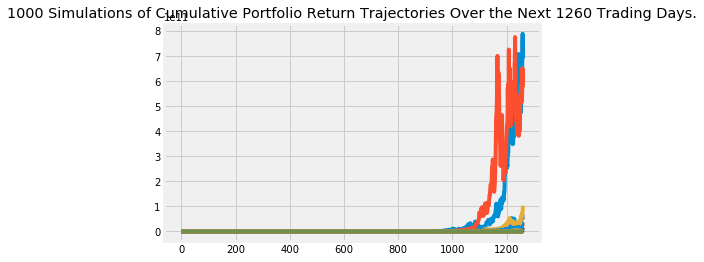

In [347]:
# Plot simulation outcomes
mc_AJG.plot_simulation();

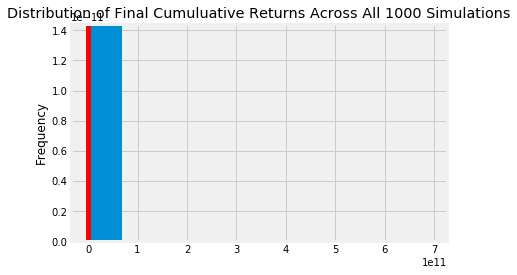

In [348]:
# Plot probability distribution and confidence intervals
mc_AJG.plot_distribution()

In [349]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_Statistics_AJG = mc_AJG.summarize_cumulative_return()

# Print summary statistics
print(Summary_Statistics_AJG)

count           1.000000e+03
mean            1.744684e+09
std             3.028401e+10
min             1.958541e-02
25%             1.365836e+04
50%             3.243771e+05
75%             7.945715e+06
max             6.908638e+11
95% CI Lower    3.050705e+01
95% CI Upper    1.588920e+09
Name: 1260, dtype: float64


# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$5,000` initial investment.

In [350]:
# Set initial investment
initial_investment = 5000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = Summary_Statistics_AJG[8] * initial_investment
ci_upper = Summary_Statistics_AJG[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in this portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $5000 in this portfolio over the next 5 years will end within in the range of $152535.26632196276 and $7944597769601.475


# ARMA Model for CHTR

In [342]:
AJG_ARMA = Tsla_Key_AJG_NIO[['close']].copy()
AJG_ARMA

KeyError: "['close'] not in index"

# ARMA Model for CHTR

In [250]:
communication_CHTR = communication_industry[['CHTR']].copy()
communication_CHTR

,CHTR
2016-01-04,177.529999
2016-01-05,175.169998
2016-01-06,174.309998
2016-01-07,173.630005
2016-01-08,174.889999
...,...
2021-02-19,607.289978
2021-02-22,596.500000
2021-02-23,602.770020
2021-02-24,608.510010


In [292]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(communication_CHTR.values, order=(1,1))
# Fit the model to the data
results_CHTR = model.fit()

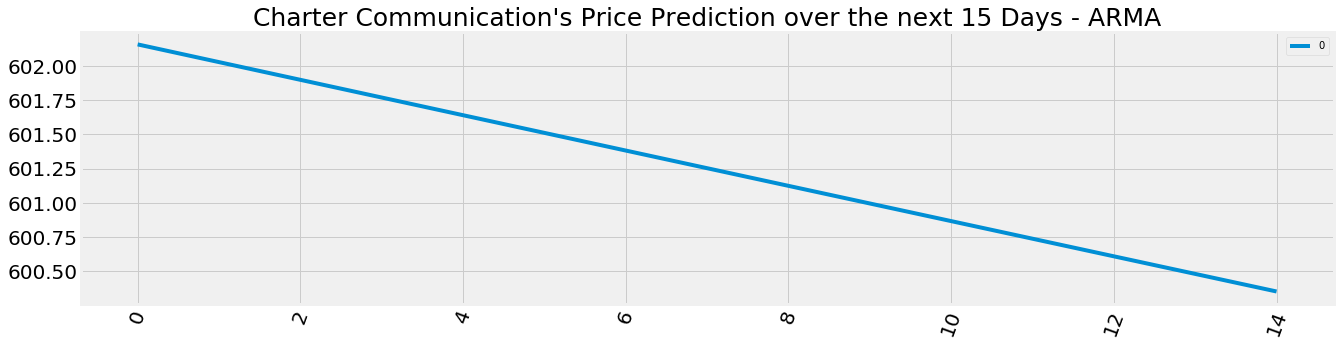

In [293]:
# Plot the forecasted return for the next 10 days
communication_CHTR_forecast = pd.DataFrame(results_CHTR.forecast(steps=15)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Charter Communication's Price Prediction over the next 15 Days - ARMA", fontsize=25);
communication_CHTR_forecast;

In [266]:
results_CHTR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1296
Model:                     ARMA(1, 1)   Log Likelihood               -4376.332
Method:                       css-mle   S.D. of innovations              7.066
Date:                Thu, 25 Feb 2021   AIC                           8760.664
Time:                        17:56:54   BIC                           8781.332
Sample:                             0   HQIC                          8768.420
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.1436    152.285      2.536      0.011      87.670     684.618
ar.L1.y        0.9994      0.001   1377.415      0.000       0.998       1.001
ma.L1.y       -0.1219      0.026     -4.685      0.000      -0.173      -0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1            8.2013           +0.0000j            8.2013            0.0000
-----------------------------------------------------------------------------
"""

# ARIMA Model for CHTR

## Autocorrelation and Partial Autocorrelation Analysis

In [282]:
# Make the data Stationary 
from statsmodels.tsa.stattools import adfuller

results_ = adfuller(communication_CHTR.dropna())
print(f"ADF Statistic: {results_[0]}")
print(f"p-value: {results_[1]}")

ADF Statistic: -0.6691003981369061
p-value: 0.8545917291438603


In [267]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

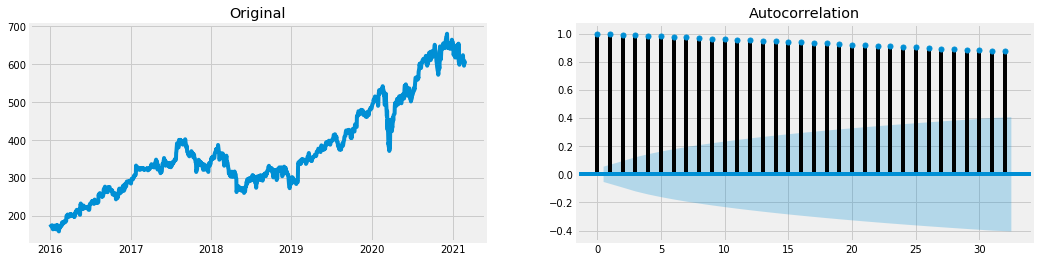

In [288]:
# Plot the autocorrelation of the Close Prices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(communication_CHTR)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(communication_CHTR, ax=ax2);

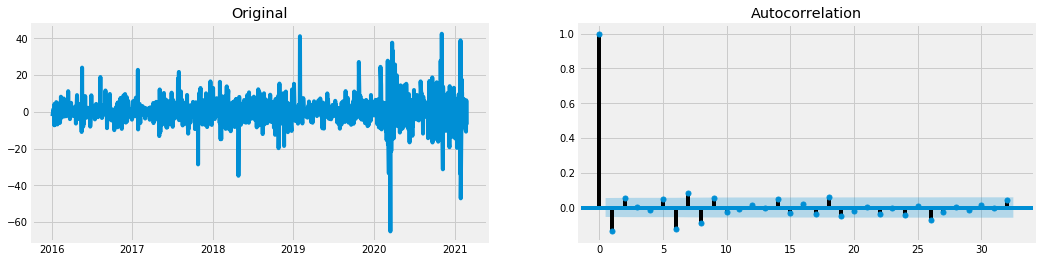

In [291]:
diff = communication_CHTR.diff().dropna()

# Plot the autocorrelation of the Return Prices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

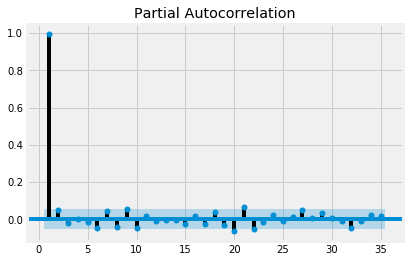

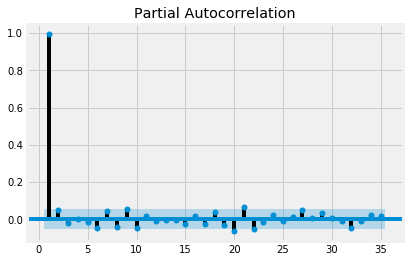

In [271]:
# Plot the partial autocorrelation of the returns
plot_pacf(communication_CHTR, zero=False, lags=35)

In [259]:
from statsmodels.tsa.arima_model import ARIMA

In [273]:
# Create an ARIMA model
model = ARIMA(communication_CHTR.values, order=(0, 1, 0))
# Fit the model to the data
results_ARIMA = model.fit()
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1295
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4379.256
Method:                           css   S.D. of innovations              7.119
Date:                Thu, 25 Feb 2021   AIC                           8762.512
Time:                        18:11:20   BIC                           8772.845
Sample:                             1   HQIC                          8766.390
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3274      0.198      1.655      0.098      -0.060       0.715
==============================================================================
"""

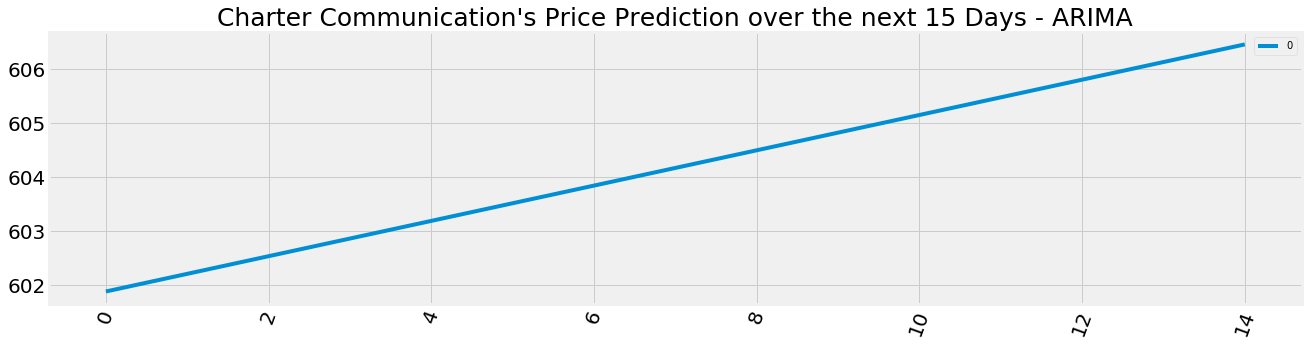

In [275]:
# Plot the Futures Price Forecast
communication_CHTR_forecast_2 = pd.DataFrame(results_ARIMA.forecast(steps=15)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Charter Communication's Price Prediction over the next 15 Days - ARIMA", fontsize=25);
communication_CHTR_forecast_2;

In [ ]:
Summary_Statistics_comm

# Make a dataFrame for Health Care Industry Stocks

In [232]:
health_industry = picked_stocks_1[['DHR', 'WST', 'IDXX']].copy()
health_industry

,DHR,WST,IDXX
2016-01-04,46.178360,56.028664,71.120003
2016-01-05,46.263977,55.318573,71.830002
2016-01-06,45.725040,55.688210,71.320000
2016-01-07,44.551441,54.462589,69.809998
2016-01-08,44.576630,53.927586,69.099998
...,...,...,...
2021-02-19,231.240005,281.549988,544.130005
2021-02-22,225.500000,272.649994,536.909973
2021-02-23,223.850006,274.290009,525.219971
2021-02-24,223.000000,278.920013,532.880005


# Make a dataFrame for Financial Industry Stocks

In [234]:
financial_industry = picked_stocks_1[['AJG', 'KEY', 'PGR']].copy()
financial_industry

,AJG,KEY,PGR
2016-01-04,35.706768,10.937732,25.656935
2016-01-05,35.804474,10.844895,25.896027
2016-01-06,35.111656,10.650785,25.607468
2016-01-07,34.383305,10.279442,25.170509
2016-01-08,34.019123,10.060012,24.799505
...,...,...,...
2021-02-19,120.180000,20.150000,87.059998
2021-02-22,120.900002,20.490000,87.790001
2021-02-23,123.129997,20.750000,89.750000
2021-02-24,123.790001,21.540001,87.739998


# Make a dataFrame for Information Technology Industry Stocks

In [235]:
it_stocks = picked_stocks_1[['AMD', 'CDNS', 'PAYC', 'PYPL', 'SNPS', 'ZBRA']].copy()
it_stocks

,AMD,CDNS,PAYC,PYPL,SNPS,ZBRA
2016-01-04,2.770000,20.530001,35.970001,34.750000,44.919998,66.489998
2016-01-05,2.750000,20.540001,34.869999,34.310001,44.970001,64.820000
2016-01-06,2.510000,20.200001,34.990002,33.980000,44.310001,62.230000
2016-01-07,2.280000,19.750000,35.540001,33.130001,43.279999,59.410000
2016-01-08,2.140000,19.240000,33.259998,32.689999,42.349998,59.250000
...,...,...,...,...,...,...
2021-02-19,89.580002,139.660004,400.130005,286.920013,268.070007,490.940002
2021-02-22,85.370003,133.160004,380.739990,273.850006,254.690002,488.309998
2021-02-23,84.739998,132.600006,377.359985,265.000000,253.210007,498.019989
2021-02-24,86.940002,139.419998,386.970001,266.070007,260.679993,512.690002


# Make a dataFrame for Material Industry Stocks

In [237]:
material_stocks = picked_stocks_1[['NEM']].copy()
material_stocks

,NEM
2016-01-04,16.944708
2016-01-05,16.926331
2016-01-06,17.054979
2016-01-07,17.330656
2016-01-08,16.549578
...,...
2021-02-19,56.669998
2021-02-22,57.490002
2021-02-23,56.840000
2021-02-24,57.080002


# Make a dataFrame for Utilities Industry Stocks

In [238]:
utilities_stock = picked_stocks_1[['NEE']].copy()
utilities_stock

,NEE
2016-01-04,22.779776
2016-01-05,23.001921
2016-01-06,22.927135
2016-01-07,23.028313
2016-01-08,23.131691
...,...
2021-02-19,78.099998
2021-02-22,75.099998
2021-02-23,74.709999
2021-02-24,73.760002


# Make a dataFrame for Industrial Industry Stocks

In [239]:
industrial_stocks = picked_stocks_1[['ODFL', 'ROL', 'TDY']].copy()
industrial_stocks

,ODFL,ROL,TDY
2016-01-04,38.347958,10.512674,87.620003
2016-01-05,38.682728,10.475277,87.519997
2016-01-06,37.757183,10.334002,86.669998
2016-01-07,36.306492,10.088844,84.440002
2016-01-08,36.037357,10.022361,82.739998
...,...,...,...
2021-02-19,215.639999,35.810001,405.910004
2021-02-22,211.759995,35.080002,398.109985
2021-02-23,211.619995,35.389999,380.910004
2021-02-24,217.309998,35.459999,390.820007


# Make a dataFrame for Consumer Staples Industry Stocks

In [240]:
consumer_stocks = picked_stocks_1[['CHD']].copy()
consumer_stocks

,CHD
2016-01-04,38.739471
2016-01-05,38.410126
2016-01-06,38.229191
2016-01-07,37.612217
2016-01-08,38.066830
...,...
2021-02-19,81.449997
2021-02-22,80.519997
2021-02-23,81.029999
2021-02-24,79.550003


# Make a dataFrame for Consumer Discretionary Industry Stocks

In [241]:
discretionary_stocks = picked_stocks_1[['BWA', 'DG', 'TGT']].copy()
discretionary_stocks

,BWA,DG,TGT
2016-01-04,38.961727,68.615555,62.577763
2016-01-05,38.334656,69.013542,63.675312
2016-01-06,37.080490,68.899841,63.028687
2016-01-07,34.775066,68.075417,62.858524
2016-01-08,33.751457,67.715332,60.731480
...,...,...,...
2021-02-19,43.560001,201.160004,188.820007
2021-02-22,44.639999,198.770004,188.990005
2021-02-23,44.880001,195.179993,186.360001
2021-02-24,46.000000,192.610001,187.080002


# Make a dataFrame for Custom Stocks

In [242]:
custom_stocks = picked_stocks_1[['TSLA', 'AAPL']].copy()
custom_stocks

,TSLA,AAPL
2016-01-04,44.681999,24.364536
2016-01-05,44.686001,23.753977
2016-01-06,43.807999,23.289116
2016-01-07,43.130001,22.306208
2016-01-08,42.200001,22.424154
...,...,...
2021-02-19,781.299988,129.869995
2021-02-22,714.500000,126.000000
2021-02-23,698.840027,125.860001
2021-02-24,742.020020,125.349998


## Plot the Results

## Use Bokeh Libraries for CandleStick Plots

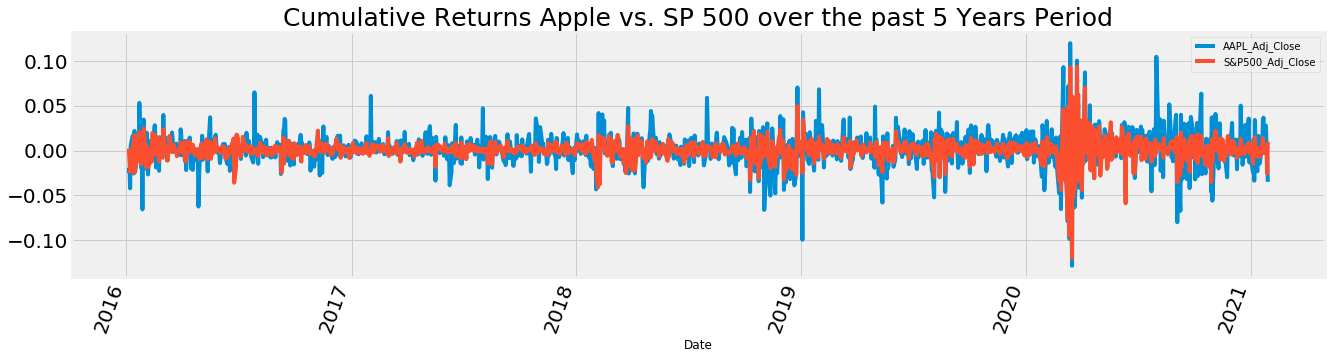

In [23]:
AAPL_SP500 = Combined_Returns.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Cumulative Returns Apple vs. SP 500 over the past 5 Years Period", fontsize=25);
AAPL_SP500;

### Cumulative Returns

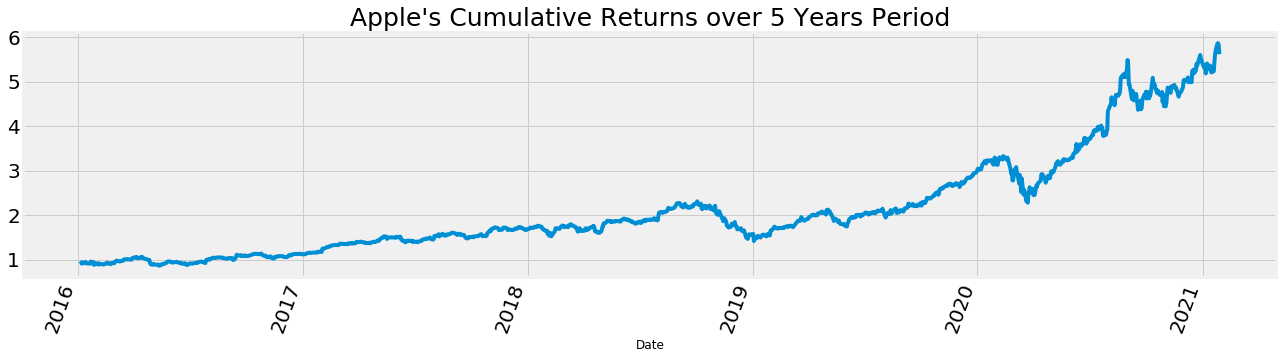

In [24]:
# Plot cumulative returns
Cumulative_Returns = (1 + AAPL_close_df_pct).cumprod()
Cumulative_Returns.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Cumulative Returns over 5 Years Period", fontsize=25);

## Exponentially Weighted Moving Average

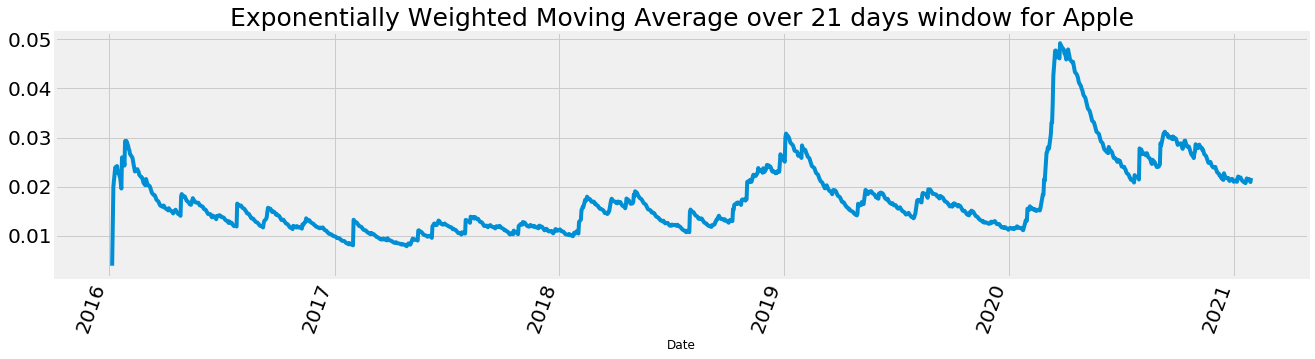

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
AAPL_MA = AAPL_close_df_pct.ewm(halflife = 21).std().plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Exponentially Weighted Moving Average over 21 days window for Apple", fontsize=25);
AAPL_MA;

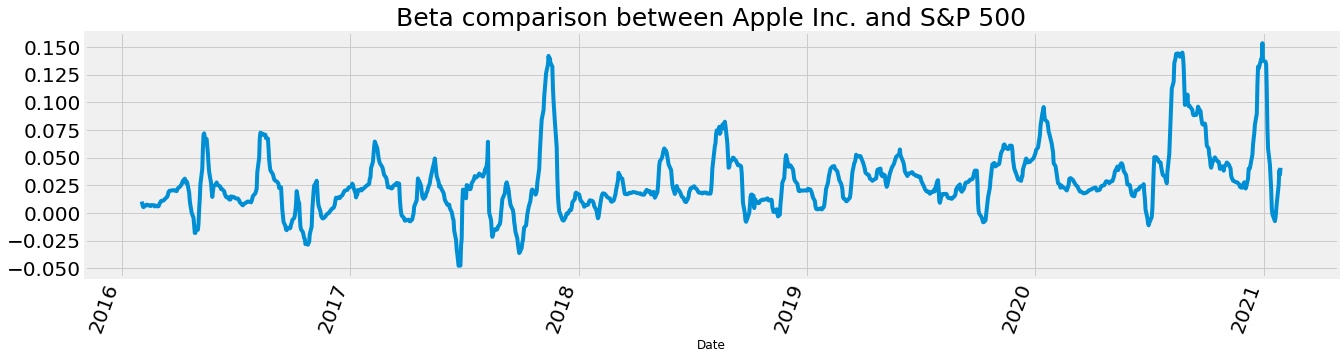

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
Covariance_Apple = Data["AAPL_Adj_Close"].rolling(window = 21).cov(Data_1["S&P500_Adj_Close"])
Variance_Apple = Data_1["S&P500_Adj_Close"].rolling(window = 21).var()
Beta_Apple = Covariance_Apple / Variance_Apple
AAPL_beta = Beta_Apple.plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Beta comparison between Apple Inc. and S&P 500", fontsize=25);
AAPL_beta;

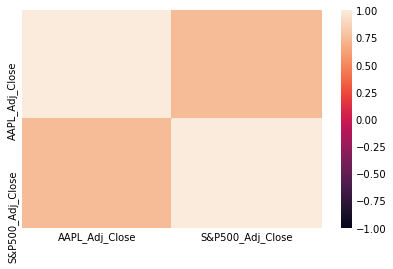

In [27]:
# Construct a correlation table
Correlation = Combined_Returns.corr()
Correlation
sns.heatmap(Correlation, vmin=-1, vmax=1)

## Forecasting Using ARMA & ARIMA Model

In [28]:
# Making sure to drop NANS before Modeling
AAPL_close_df_pct = AAPL_close_df_pct.dropna()
AAPL_close_df_pct.head()

Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
Name: AAPL_Adj_Close, dtype: float64

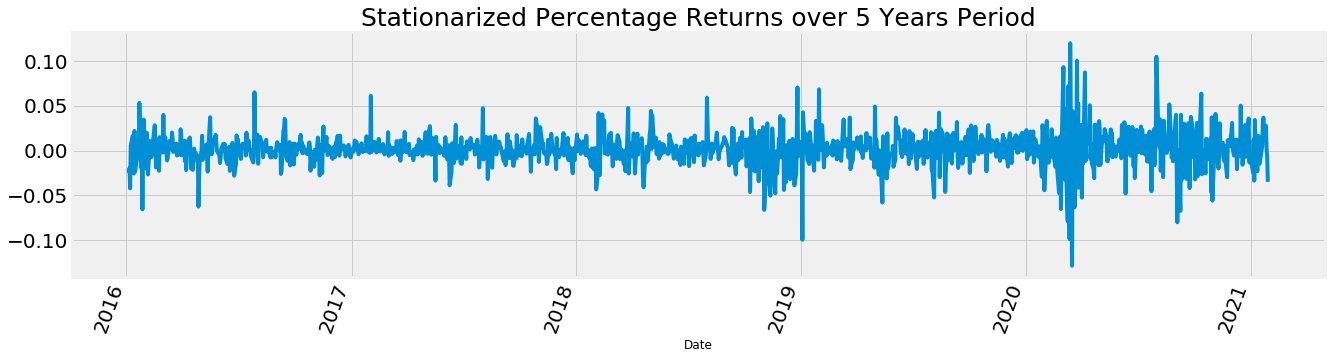

In [29]:
# Data must be Stationarized and here is the plot
from matplotlib import pyplot as plt    
AAPL_close_df_pct.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Percentage Returns over 5 Years Period", fontsize=25);

## ARMA Model for Apple Inc

## ARIMA Model for Apple Inc

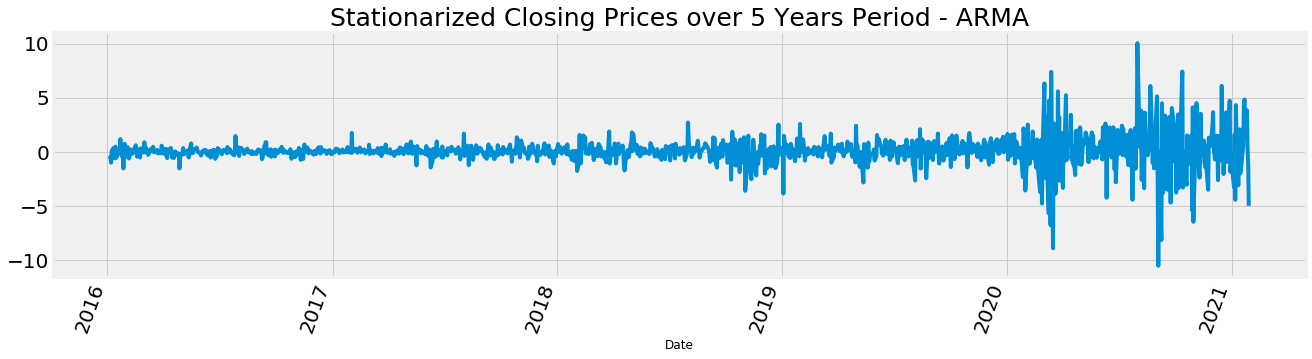

In [33]:
# Differencing the Close price stationarizes the time series
AAPL_close_df.diff().plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Closing Prices over 5 Years Period - ARMA", fontsize=25);

## Autocorrelation and Partial Autocorrelation Analysis

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

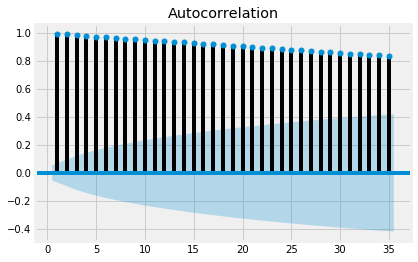

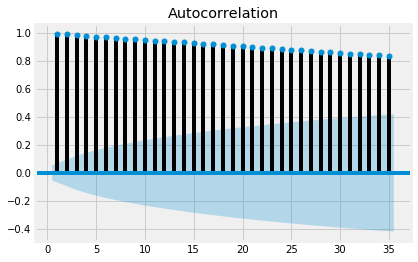

In [35]:
# Plot the autocorrelation of the Close Prices
plot_acf(AAPL_close_df, zero=False, lags=35)

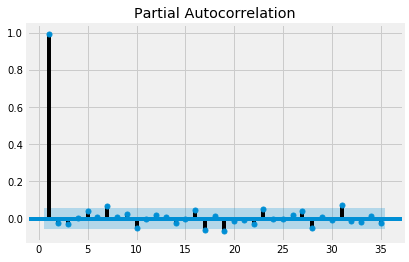

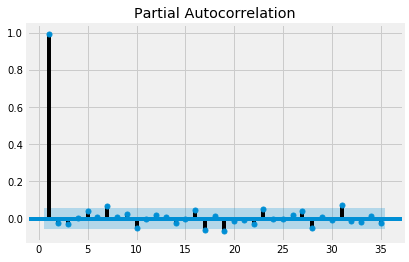

In [36]:
# Plot the partial autocorrelation of the returns
plot_pacf(AAPL_close_df, zero=False, lags=35)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
# Create an ARIMA model
model = ARIMA(AAPL_close_df.values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA = model.fit()
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1276
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2164.858
Method:                       css-mle   S.D. of innovations              1.320
Date:                Thu, 28 Jan 2021   AIC                           4337.716
Time:                        20:39:19   BIC                           4358.322
Sample:                             1   HQIC                          4345.455
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0887      0.034      2.630      0.009       0.023       0.155
ar.L1.D.y     -0.3554      0.159     -2.239      0.025      -0.666      -0.044
ma.L1.D.y      0.2368      0.164      1.443      0.149      -0.085       0.559
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8141           +0.0000j            2.8141            0.5000
MA.1           -4.2229           +0.0000j            4.2229            0.5000
-----------------------------------------------------------------------------
"""

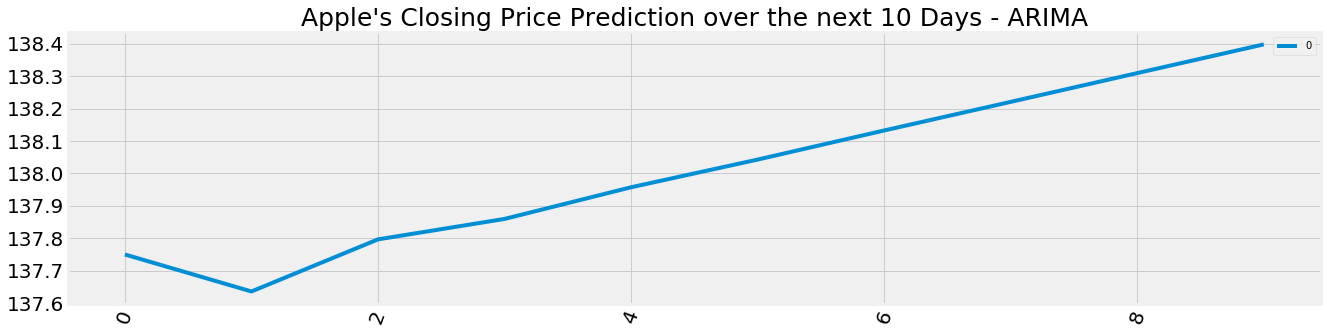

In [39]:
# Plot the Futures Price Forecast
AAPL_ARIMA = pd.DataFrame(results_ARIMA.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARIMA", fontsize=25);
AAPL_ARIMA;

## ARIMA Model for BitCoin

In [40]:
# Create an ARIMA model for BitCoin
model_BTC = ARIMA(BTC_df["BTC_Close"].values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA_BTC = model_BTC.fit()
# Print the model summary
results_ARIMA_BTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5542.347
Method:                       css-mle   S.D. of innovations            538.868
Date:                Thu, 28 Jan 2021   AIC                          11092.694
Time:                        20:39:21   BIC                          11111.006
Sample:                             1   HQIC                         11099.764
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9859     20.534      2.045      0.041       1.740      82.232
ar.L1.D.y     -0.0960      0.527     -0.182      0.856      -1.129       0.937
ma.L1.D.y      0.1199      0.525      0.229      0.819      -0.909       1.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -10.4166           +0.0000j           10.4166            0.5000
MA.1           -8.3400           +0.0000j            8.3400            0.5000
-----------------------------------------------------------------------------
"""

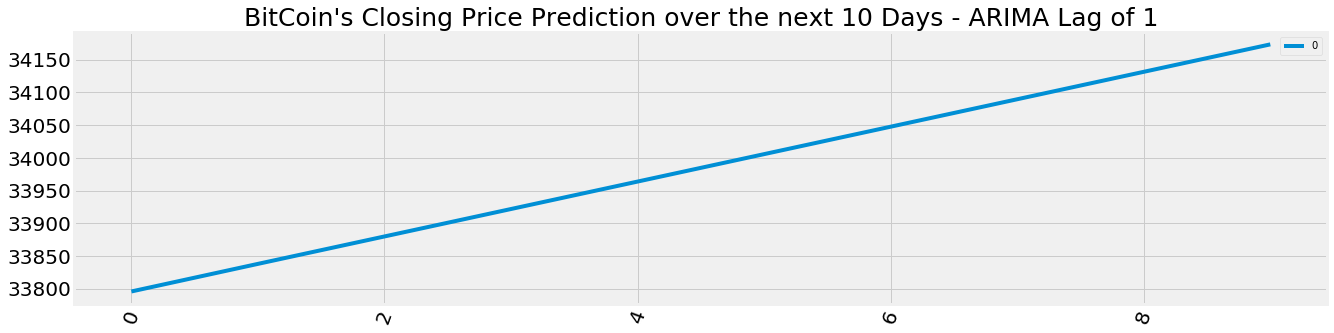

In [41]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_BTC.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 1", fontsize=25);

## ARIMA Model using a Lag of 2 for BitCoin

In [42]:
# Create an ARIMA Model and fit it to the data
model_2 = ARIMA(BTC_df["BTC_Close"].values, order=(2, 1, 1))
results_ARIMA_2 = model_2.fit()
# print the model summary
results_ARIMA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5541.958
Method:                       css-mle   S.D. of innovations            538.576
Date:                Thu, 28 Jan 2021   AIC                          11093.915
Time:                        20:39:24   BIC                          11116.805
Sample:                             1   HQIC                         11102.752
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7250     19.636      2.125      0.034       3.239      80.211
ar.L1.D.y      0.3106      0.346      0.897      0.370      -0.368       0.989
ar.L2.D.y     -0.0393      0.038     -1.038      0.299      -0.114       0.035
ma.L1.D.y     -0.2877      0.345     -0.835      0.404      -0.963       0.388
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.9470           -3.1364j            5.0414           -0.1069
AR.2            3.9470           +3.1364j            5.0414            0.1069
MA.1            3.4763           +0.0000j            3.4763            0.0000
-----------------------------------------------------------------------------
"""

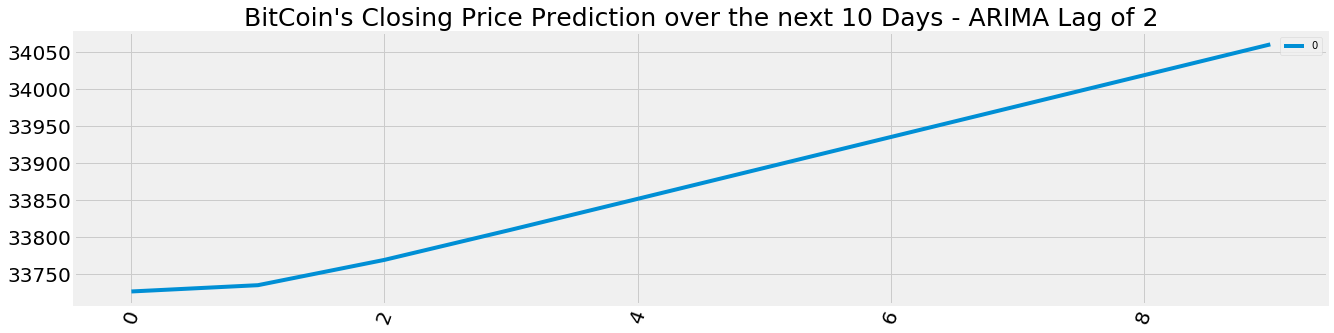

In [43]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_2.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 2", fontsize=25);

## Linear Regression with Train/Test split

In [44]:
import arch as arch
import warnings
warnings.filterwarnings('ignore')

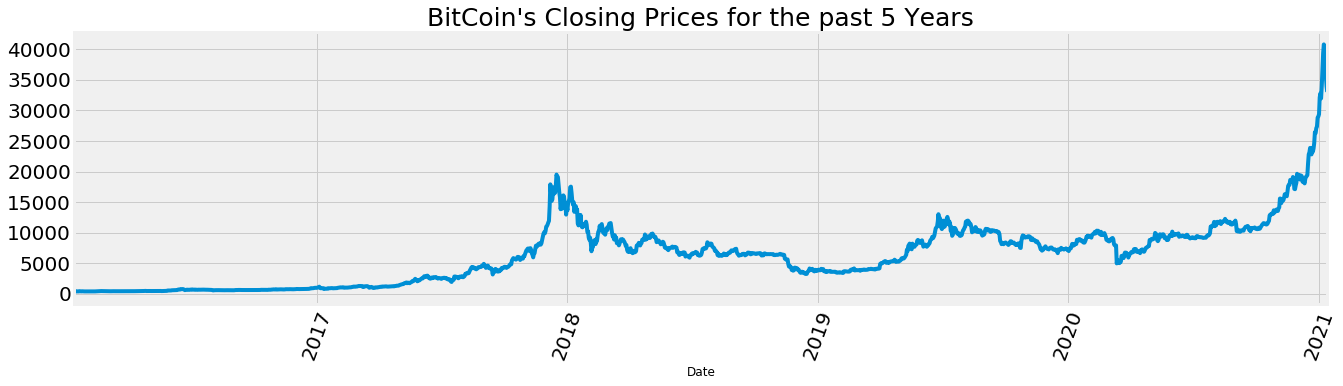

In [45]:
BTC_path = Path('../Resources/BTC.csv')
BTC_csv = pd.read_csv(BTC_path, parse_dates=True, index_col='Date')
BTC_csv.Close.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Prices for the past 5 Years", fontsize=25);

In [46]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
BTC_csv['Return'] = BTC_csv.Close.pct_change() * 100
BTC_csv['Lagged_Return'] = BTC_csv['Return'].shift()
BTC_csv = BTC_csv.dropna()
BTC_csv.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,-1.331114,3.623390
2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,-4.715257,-1.331114
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567398,-7.273316,-4.715257
2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,74773277909,-4.621450,-7.273316
2021-01-13,33963.351563,34061.976563,32643.052734,33017.734375,33017.734375,75174313984,-2.668477,-4.621450


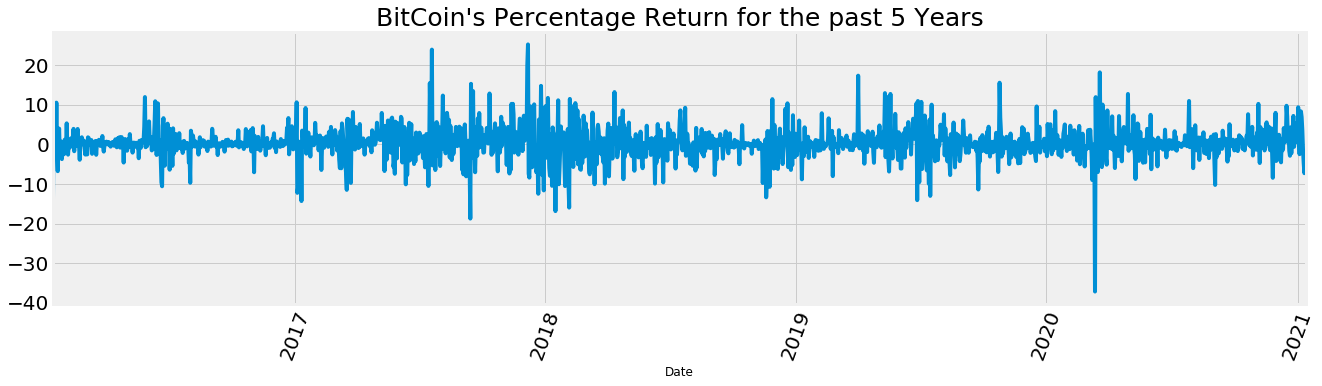

In [47]:
BTC_csv['Return'].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return for the past 5 Years", fontsize=25);

In [48]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = BTC_csv['2017':'2019']
test = BTC_csv['2020']
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## Make predictions using the Testing Data

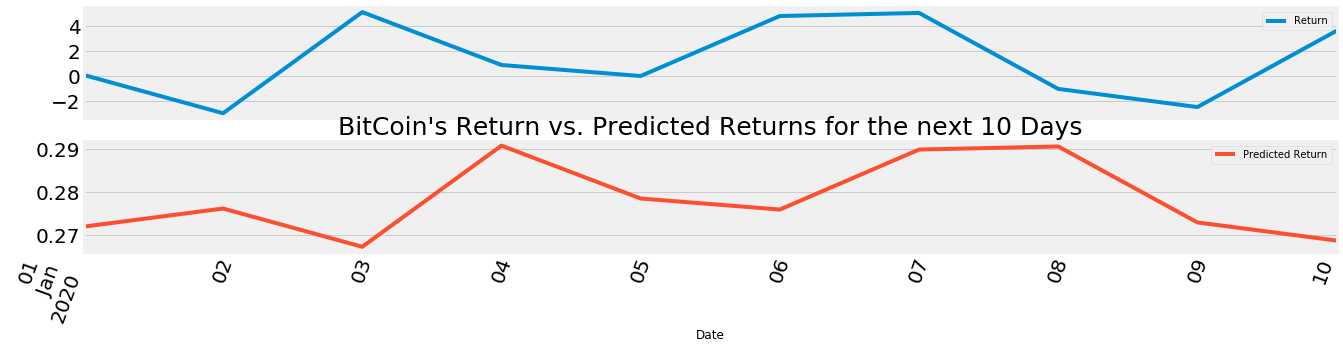

In [49]:
# Make a prediction of "y" values using just the test dataset
BTC_predictions = model_LR.predict(X_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Predictions_Results = y_test.to_frame()
Predictions_Results["Predicted Return"] = BTC_predictions

# Plot the first 20 predictions vs the true values
Predictions_Results[:10].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    subplots=True,
    grid=True);
plt.title(label="BitCoin's Return vs. Predicted Returns for the next 10 Days", fontsize=25);

## Out-of-Sample Performance


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Predictions_Results["Return"],
    Predictions_Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 3.771512992249688


## In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [51]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model_LR.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 4.324559463850791


## ARMA Model for BitCoin Prediction

In [52]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_5 = ARMA(BTC_csv['Return'].values, order=(1,1))
# Fit the model to the data
results_5 = model_5.fit()

# Look at Summary
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood               -5091.650
Method:                       css-mle   S.D. of innovations              3.933
Date:                Thu, 28 Jan 2021   AIC                          10191.300
Time:                        20:39:38   BIC                          10213.340
Sample:                             0   HQIC                         10199.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.091      3.471      0.001       0.138       0.495
ar.L1.y       -0.8863      0.085    -10.466      0.000      -1.052      -0.720
ma.L1.y        0.8681      0.090      9.620      0.000       0.691       1.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1283           +0.0000j            1.1283            0.5000
MA.1           -1.1519           +0.0000j            1.1519            0.5000
-----------------------------------------------------------------------------
"""

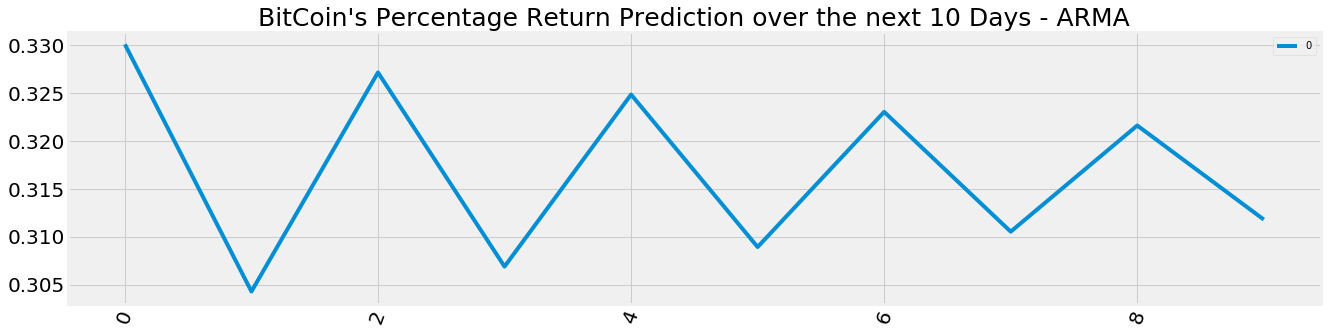

In [53]:
# Plot the forecasted return for the next 20 days
pd.DataFrame(results_5.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return Prediction over the next 10 Days - ARMA", fontsize=25);

## Dashboard

In [54]:
# Create panels to structure the layout of the dashboard
price_column = pn.Column("Price Analysis", AAPL_MA, AAPL_beta, AAPL_SP500)
prediction_column = pn.Column(
    "## Model Predictions", AAP_return_forecast, AAPL_ARIMA)

In [55]:
pop_dashboard = pn.Tabs(
    (
        "Price Analysis",
        price_column
    ),
    (
        "Price Predictions",
        prediction_column
    )
)

pop_dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
        [3] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)